In [44]:
import requests
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
for i in range (2, 20):
# URL of the page to scrape
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/'
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response, 'html.parser')
    reviews = soup.find_all('article', {'itemprop':'review'})
    for i in reviews:
        review_title = i.find('h2')
        print((review_title).text)

In [52]:
review_titles = {
'Review' : [
"one of the worst airlines",
"my travel pram confiscated from me",
"VERY uncomfortable seats",
"substandard business class experience",
"Customer Service is shocking",
"left me extremely disappointed", 
"customer service was awful",
"over 2 weeks to respond",
"wholly inadequate customer service",
"the cabin crew were great",
"cannot recommend BA",
"a very poor last impression of BA",
"happy to recommend BA",
"cancelled our return flight", 
"Very good experience all round",
"inflight service was efficient and friendly",
"worst airline I’ve ever flown",
"Cabin crew were great",
"flight itself was quite good",
"You expect better from BA",
"never fly British Airways",
"we will rethink BA moving forward",
"extremely poor customer service",
"a pleasant and civilized journey",
"the worst BA flight we've experienced",
"Never again British Airways",
"only been offered half a glass of water",
"told by cabin crew I would be refunded",
"premium price for a sub-par product",
"can't even choose my own seat",
"Very impressed with BA",
"appalling customer service",
"baggage customer service is a joke",
"Worst business class ever",
"replicating the likes of Ryanair",
"declined to offer compensation",
"onboard like discount carriers",
"Never using them again",
"undiscerning and insincere compensation",
"mock and insult your passengers",
"lost my luggage on both flights",
"the worst experience",
"The flights were okay",
"entire experience has been stressful",
"whole experience was awful",
"This is true service",
"Flight attendants welcoming",
"the service was appalling",
"service was slow and unfriendly",
"a really lovely flight",
"travelling with British Airways so stressful",
"didn't find the crew particularly welcoming",
"I would say disappointing",
"Exceptional flight",
"Cabin crew attentive and bubbly",
"a terrible and unnecessary experience",
"stick to their cabin bag size limit",
"crew were attentive, friendly",
"Utterly outrageous",
"They have a long way to go", 
"FA's were friendly",
"Far from pleasant experience",
"cancelled our return flight",
"KLM is definitely a league over BA",
"Service extremely inattentive",
"worst business class experience",
"it's truly awful for short-haul",
"never be flying with BA again",
"it was extremely underwhelming",
"an excellent experience",
"they refused to fly me back!",
"Poor from start to finish",
"customer service non existent",
"no better than the worst of the low cost",
"could not have been better",
"Never again",
"Is this how low BA has fallen?",
"It was a terrible experience",
"all needs a serious rework",
"flights they have not actually provided",
"meticulous attention to detail",
"they have ignored every communication",
"fabulous cabin crew",
"no great expectations",
"actively try and split families up",
"my cabin luggage was taken",
"appalling service",
"Worst service ever",
"unprofessional attitude of the pilots",
"Next time it will be Jet2",
"become the Ryanair of long-haul travel",
"They never help us",
"uncomfortable seat and disgusting food",
"Zero customer service",
"baggage arrival nearly took 1.5 hours",
"Overall very satisfied",
"airline is a total disgrace",
"we were pleased with the service",
"Gate agent was extremely rude",
"incredibly heartless and incompetent company"
],
'Actual_Purchase' : [0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0]
}

In [54]:
df = pd.DataFrame(review_titles)
print(df)

                                          Review  Actual_Purchase
0                      one of the worst airlines                0
1             my travel pram confiscated from me                0
2                       VERY uncomfortable seats                0
3          substandard business class experience                0
4                   Customer Service is shocking                0
..                                           ...              ...
95                        Overall very satisfied                1
96                   airline is a total disgrace                0
97              we were pleased with the service                1
98                 Gate agent was extremely rude                0
99  incredibly heartless and incompetent company                0

[100 rows x 2 columns]


In [36]:
def analyze_sentiment_textblob(reviews):
    sentiments = []
    for review in reviews:
        blob = TextBlob(review)
        sentiment = blob.sentiment.polarity
        # Convert polarity score to a sentiment label
        if sentiment > 0:
            sentiments.append('POSITIVE')
        elif sentiment < 0:
            sentiments.append('NEGATIVE')
        else:
            sentiments.append('NEUTRAL')
    return sentiments
sentiments = analyze_sentiment_textblob(review_titles)

# Combine the results into a list of dictionaries
review_analysis = [{'Review': review, 'Sentiment': sentiment}
                   for review, sentiment in zip(review_titles, sentiments)]

# Print the analysis results
for review in review_analysis:
    print(f"Review: {review['Review']}")
    print(f"Sentiment: {review['Sentiment']}\n")

# Generate a bar chart for sentiment distribution
sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

Review: Review
Sentiment: NEUTRAL

Review: actual_scores
Sentiment: NEUTRAL



In [62]:

# Check for 'Actual_Purchase' column
if 'Actual_Purchase' not in df.columns:
    print("Error: 'Actual_Purchase' column is missing in the DataFrame.")
else:
    # Analyze sentiment using TextBlob
    def analyze_sentiment(review):
        blob = TextBlob(review)
        return blob.sentiment.polarity

    # Apply sentiment analysis
    df['Sentiment_Polarity'] = df['Review'].apply(analyze_sentiment)

    # Define a rule-based prediction based on sentiment polarity
    def predict_purchase(sentiment_polarity):
        if sentiment_polarity > 0.1:
            return 1  # Likely to buy
        elif sentiment_polarity < -0.1:
            return 0  # Unlikely to buy
        else:
            return 0  # Neutral or slightly negative, assume less likely to buy

    # Apply the prediction function
    df['Predicted_Purchase'] = df['Sentiment_Polarity'].apply(predict_purchase)

    # Print the DataFrame to see the results
    print(df[['Review', 'Sentiment_Polarity', 'Actual_Purchase', 'Predicted_Purchase']])

    # Step 1: Calculate accuracy
    accuracy = accuracy_score(df['Actual_Purchase'], df['Predicted_Purchase'])
    print(f"\nAccuracy: {accuracy:.2f}")

    # Step 2: Generate a classification report
    report = classification_report(df['Actual_Purchase'], df['Predicted_Purchase'], target_names=['not likely to fly with BA', 'likely to fly with BA'])
    print("\nClassification Report:\n", report)

                                          Review  Sentiment_Polarity  \
0                      one of the worst airlines              -1.000   
1             my travel pram confiscated from me               0.000   
2                       VERY uncomfortable seats              -0.650   
3          substandard business class experience               0.000   
4                   Customer Service is shocking              -1.000   
..                                           ...                 ...   
95                        Overall very satisfied               0.325   
96                   airline is a total disgrace               0.000   
97              we were pleased with the service               0.500   
98                 Gate agent was extremely rude              -0.300   
99  incredibly heartless and incompetent company               0.275   

    Actual_Purchase  Predicted_Purchase  
0                 0                   0  
1                 0                   0  
2        

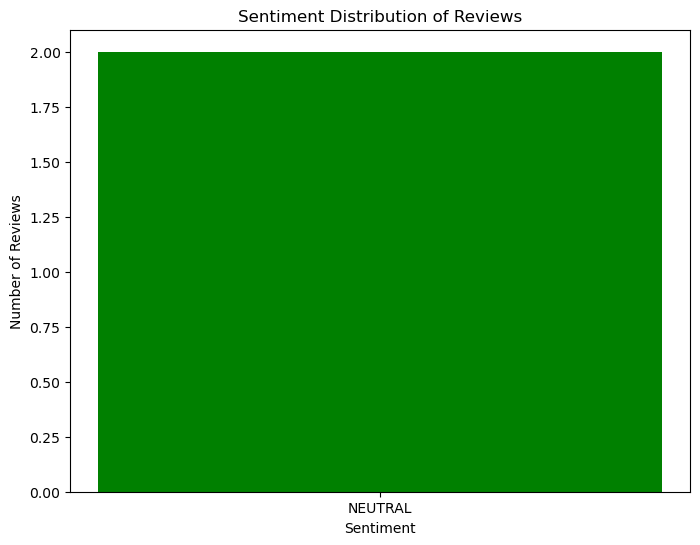

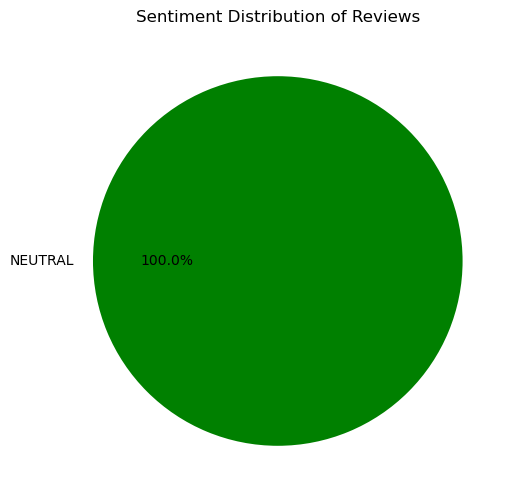

In [58]:
sentiment_counts = {sentiment: sentiments.count(sentiment) for sentiment in set(sentiments)}

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Generate a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.show()

In [ ]:
print(df)